# Particle swarm optimization
### Carl Fredrik Berg, NTNU, 2023

The <i>particle swarm optimization</i> (PSO) method is a particle based optimization method that tries to find an optimium by iteratively improving a swarm of candidate solutions (a population of particles). The particles have a position and a velocity, and moves to the next test position based on its velocity. The velocity is updated by the best position traversed by the particle itself and the best position of the entire population.

The PSO algorithm is not using the local gradient to move the particle, thus it is a derivative free optimization method. As such, it does not require the problem to be differentiable, such as, e.g., the [gradient descent method](./gradientDescent.ipynb). 

The PSO method was developed by Kennedy and Eberhart in 1995, thus it is a fairly new method. It has gained significant popularity, as is currently a widely used method for optimization.

Let $f \colon \mathbb{R}^n \to \mathbb{R}$ be the function we want to optimize (in our case, maximize). Let $I$ be the set of particles, with $\vec{p}_i$ being the best known position for particle $i \in I$ and $\vec{g}$ being the best known position of the full population. A psedu-code for the algorithm is as follows:

1. <i>Initialization:</i> Initialize your population of particles with a set position $\vec{x}_i$, where the subscript $i$ represents particle $i \in I$ in the population $I$. The initial positions can be distributed randomly in the search space, or by any other sampling method (e.g., the Latin hypercube sampling). Initialize the particles best known position as the current position $\vec{p}_i$. Set the best known position of the population as $\vec{g} = \{ \vec{p}_i \mid f(\vec{p}_i) \geq f(\vec{p}_j) \forall j \in I \}$. Initialize the particle velocities randomly (you could also possible set them all to zero).
2. <i>Update velocity:</i> Update the particle velocity as $\vec{v}_i = w \vec{v}_i + c_1 (\vec{p}_i - \vec{x}_i) + c_2 (\vec{g}-\vec{x}_i)$. 
3. <i>Update position:</i> Update the particle position as $\vec{x}_i = \vec{x}_i + \vec{v}_i$.
4. <i>Find local and global best positions:</i> For all $i \in I$: If $f(\vec{x}_i) > f(\vec{p}_i)$, then let $\vec{p}_i = \vec{x}_i$. If $f(\vec{p}_i) > f(\vec{g})$, then let $\vec{g} = \vec{p}_i$.
5. <i> Convergence:</i> Repeat step 2 to 4 until a fixed number of steps or until the improvement in the best solution start to converge.

The factor $w$ in step 2 will give some inertia to the particle; if $w=0$ it has no inertia. The so-called learning factors $c_1$ and $c_2$, typically chosen between 0 and 1, control how much the particle learn from its own history and from the entire population. The $c_1$ is sometimes called the cognitive coefficient, while $c_2$ is called the social coefficient.

Below we implement PSO in python.


1 -0.283544714781662 [-0.61525795 -0.56388628]
2 -0.11130983869224106 [-0.5255393  -0.41025434]
3 -0.11130983869224106 [-0.5255393  -0.41025434]
4 -0.04229270857158586 [-0.57055437 -0.39734059]
5 -0.04229270857158586 [-0.57055437 -0.39734059]
6 -0.03705939364978067 [-0.57155802 -0.41213735]
7 -0.0358899307339719 [-0.57388038 -0.40763673]
8 -0.035612270614793204 [-0.57415057 -0.40799146]
9 -0.03529588971192291 [-0.57454746 -0.40817184]
10 -0.03510419090201651 [-0.57489301 -0.40802998]


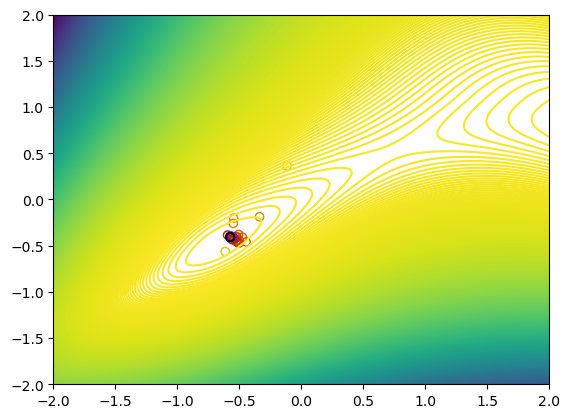

In [29]:
import numpy as np
import matplotlib.pyplot as plt

cmap = plt.get_cmap('gnuplot')


def hObjectiveFunction(fx,fy):
    return -np.abs((3 - fx)*fx-3*fy+1.0)**(7.0/3.0)-np.abs((3-fy)*fy-fx+1.0)**(7.0/3.0)

fDelta = 0.025
aafy, aafx = np.mgrid[slice(-2.0, 2.0 + fDelta, fDelta),slice(-2.0, 2.0 + fDelta, fDelta)]
plt.contour(aafx, aafy, hObjectiveFunction(aafx,aafy),1000)#, cmap=cm.Purples_r)

def plotPopulation(aaPopulation,iIteration):
#    print(iIteration,aaPopulation[:,0],aaPopulation[:,1])
    plt.scatter(aaPopulation[:,0],aaPopulation[:,1],facecolors='none', edgecolors=cmap(1.0-iIteration/iMaxIt),)
    return None

#Coefficients
fInertia=0.2
fCognitive=0.5
fSocial=0.5

#Set population size
iPopNum=5

#Set convergence criteria
iMaxIt=10

#Initialize positions
aaPopulation=np.random.uniform(-2.0,2.0,(iPopNum,2))
aaBestPosition=np.copy(aaPopulation)
aaVelocities=np.random.uniform(-1.0,1.0,(iPopNum,2))

fGlobalBest=np.array([0,0])
for ii in range(0,iPopNum):
    if hObjectiveFunction(aaBestPosition[ii,0],aaBestPosition[ii,1])>hObjectiveFunction(fGlobalBest[0],fGlobalBest[1]):
        fGlobalBest=aaBestPosition[ii,:]

ii=0
while ii<iMaxIt:
    ii+=1
    aaVelocities=fInertia*aaVelocities+fCognitive*(aaBestPosition-aaPopulation)+fSocial*(fGlobalBest-aaPopulation)
    aaPopulation=aaPopulation+aaVelocities
    for jj in range(0,iPopNum):
        if hObjectiveFunction(aaPopulation[jj,0],aaPopulation[jj,1])>hObjectiveFunction(aaBestPosition[jj,0],aaBestPosition[jj,1]):
            aaBestPosition[jj,:]=aaPopulation[jj,:]
            if hObjectiveFunction(aaBestPosition[jj,0],aaBestPosition[jj,1])>hObjectiveFunction(fGlobalBest[0],fGlobalBest[1]):
                fGlobalBest=aaBestPosition[jj,:]
    print(ii,hObjectiveFunction(fGlobalBest[0],fGlobalBest[1]),fGlobalBest)
    plotPopulation(aaPopulation,ii)

plt.show()